In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import pickle
import os
import colour

In [2]:
tlow = 100
thigh = 200
num_tasks = 100
epoch =  5
split = 'test'
#expdir = 'output/ant-sparse/proto-sac-ant-sparse-low-gear-1task-50traj/eval_trajectories'
expdir = 'output/ant-sparse/proto-sac-ant-sparse-low-gear-200task-50traj/eval_trajectories'
#expdir = 'output/wheeled/proto-sac-wheeled-sparse-1task-50traj/eval_trajectories'



def load_pkl(task):
    with open(os.path.join(expdir, '{}-task{}-epoch{}.pkl'.format(split, task, epoch)), 'rb') as f:
        data = pickle.load(f)
    return data

def load_pkl_prior():
    with open(os.path.join(expdir, 'prior-epoch{}.pkl'.format(epoch)), 'rb') as f:
        data = pickle.load(f)
    return data

def load_pkl_rb():
    with open(os.path.join(expdir, 'replay-buffer-{}-epoch{}.pkl'.format(split, epoch)), 'rb') as f:
        data = pickle.load(f)
    return data

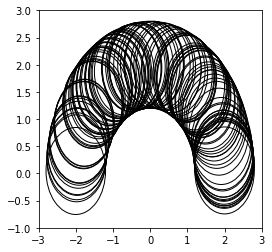

In [3]:
goals = [load_pkl(task)[0]['goal'] for task in range(tlow, thigh)]
plt.figure(figsize=(4,4))
axes = plt.axes()
plt.axis([-3, 3, -1, 3])
for g in goals:
    circle = plt.Circle((g[0], g[1]), radius=0.8, fill=False)
    axes.add_artist(circle)

#### Trajectories from the final posterior

Avg Reward Task 0 384.250586448
Avg Final Reward Task 0 1.92728412691


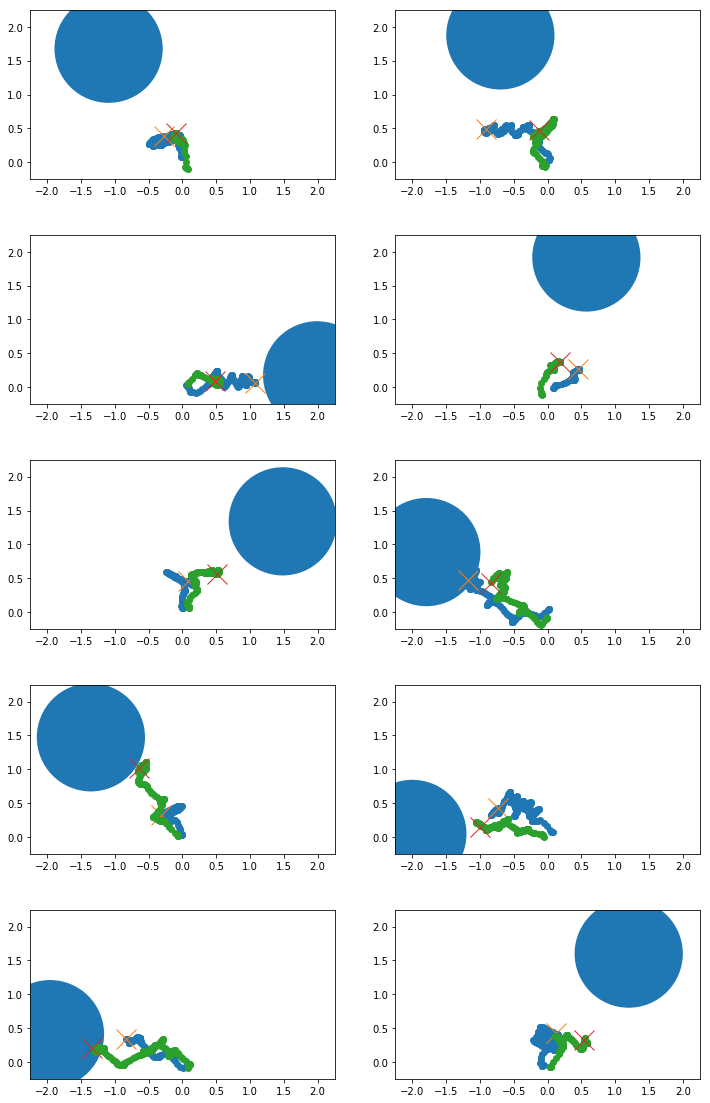

In [4]:
paths = [load_pkl(task) for task in range(tlow, tlow+10)]

fig, axes = plt.subplots(5, 2, figsize=(12, 20))
t = 0
for j in range(2):
    for i in range(5): 
        axes[i, j].set_xlim([-2.25, 2.25])
        axes[i, j].set_ylim([-0.25, 2.25])
        rewards = 0
        final_rewards = 0
        g = paths[t][0]['goal']
        circle = plt.Circle((g[0], g[1]), radius=0.8)
        axes[i, j].add_artist(circle)
        for traj in paths[t]:
            rewards += sum(traj['rewards'])
            final_rewards += traj['rewards'][-1]
            states = traj['observations']
            axes[i, j].plot(states[:-1, 0], states[:-1, 1], '-o')
            axes[i, j].plot(states[-1, 0], states[-1, 1], '-x', markersize=20)
            axes[i, j].set(aspect='equal')
        t += 1

print('Avg Reward Task 0', sum(rewards) / len(paths[0]))
print('Avg Final Reward Task 0', sum(final_rewards / len(paths[0])))

#### Trajectories sampled from the prior

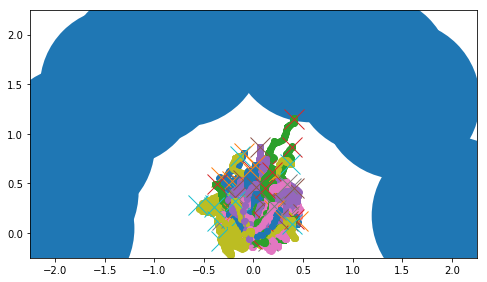

In [6]:
paths = load_pkl_prior()
goals = [load_pkl(task)[0]['goal'] for task in range(tlow, tlow+10)]

plt.figure(figsize=(8,8))
axes = plt.axes()
axes.set(aspect='equal')
axes.set_xlim([-2.25, 2.25])
axes.set_ylim([-0.25, 2.25])
for g in goals:
    circle = plt.Circle((g[0], g[1]), radius=0.8)
    axes.add_artist(circle)
rewards = 0
final_rewards = 0
for traj in paths:
    rewards += sum(traj['rewards'])
    final_rewards += traj['rewards'][-1]
    states = traj['observations']
    plt.plot(states[:-1, 0], states[:-1, 1], '-o')
    plt.plot(states[-1, 0], states[-1, 1], '-x', markersize=20)

#### Posterior sampling over trajectories

100


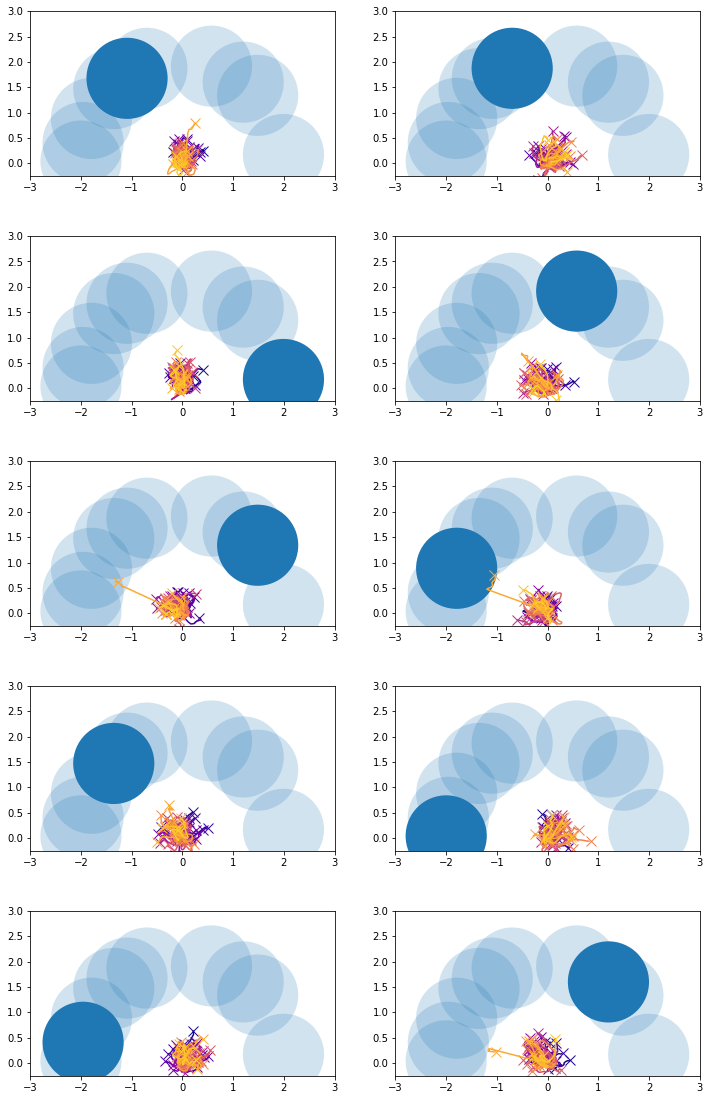

In [8]:
all_data = load_pkl_rb() 
mpl = 20
num_trajs = 60
print(len(all_data))

all_paths = []
for task in np.random.randint(0, num_tasks, 10):
    data = all_data[task]
    task_paths = []
    for start in data['starts']:
        task_paths.append(data['observations'][start : start + mpl])
    all_paths.append(task_paths)

# color trajectories in order they were collected
cmap = matplotlib.cm.get_cmap('plasma')
sample_locs = np.linspace(0, 0.9, num_trajs)
colors = [cmap(s) for s in sample_locs]

fig, axes = plt.subplots(5, 2, figsize=(12, 20))
t = 0
for j in range(2):
    for i in range(5): 
        axes[i, j].set_xlim([-3, 3])
        axes[i, j].set_ylim([-0.25, 3])
        for k, g in enumerate(goals):
            alpha = 1 if k == t else 0.2
            circle = plt.Circle((g[0], g[1]), radius=0.8, alpha=alpha)
            axes[i, j].add_artist(circle)
        indices = list(np.linspace(0, len(all_paths[t]), num_trajs, endpoint=False).astype(np.int))
        counter = 0
        for idx in indices:
            states = all_paths[t][idx]
            axes[i, j].plot(states[:-1, 0], states[:-1, 1], '-', color=colors[counter])
            axes[i, j].plot(states[-1, 0], states[-1, 1], '-x', markersize=10, color=colors[counter])
            axes[i, j].set(aspect='equal')
            counter += 1
        t += 1

In [12]:
x = np.ones(3)
print(x.dtype)

float64


In [13]:
x = 0
print(x)
print(x.dtype)

0


AttributeError: 'int' object has no attribute 'dtype'